Welcome to my NLP Sentiment Analysis Model Comparison. This Program compares FinBert, DistilBERT and TextBlob.


TESTING MODELS ON FINANCES!

Index(['Full', 'Sentiments'], dtype='object')

 RAW SENTIMENTS
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

<Figure size 600x500 with 0 Axes>

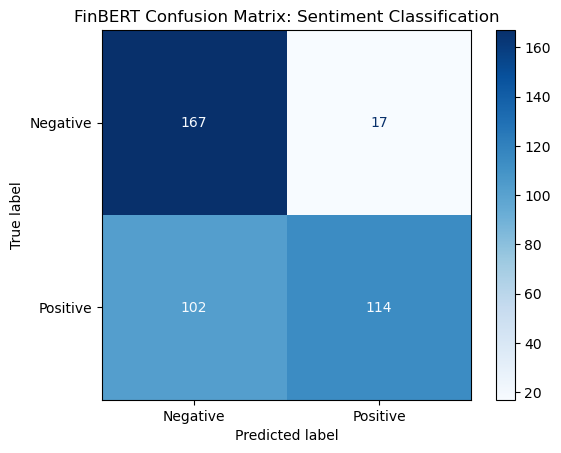


FinBERT Accuracy: 70.25%

FinBERT Accuracy (excluding neutrals): 71.91%
FinBERT Runtime: 170.68 seconds

DistilBERT Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

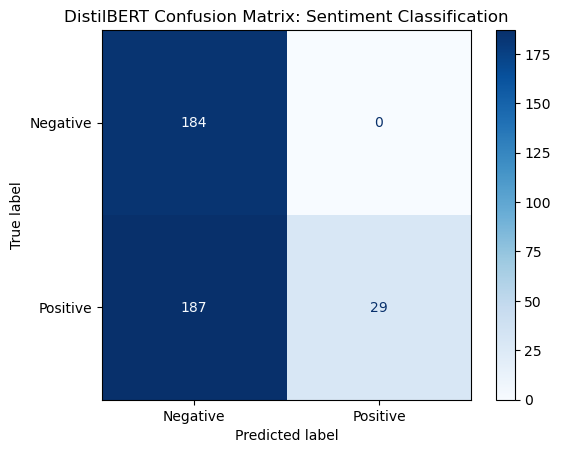


DistilBERT Accuracy: 53.25%
DistilBERT Runtime: 90.44 seconds

TextBlob Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

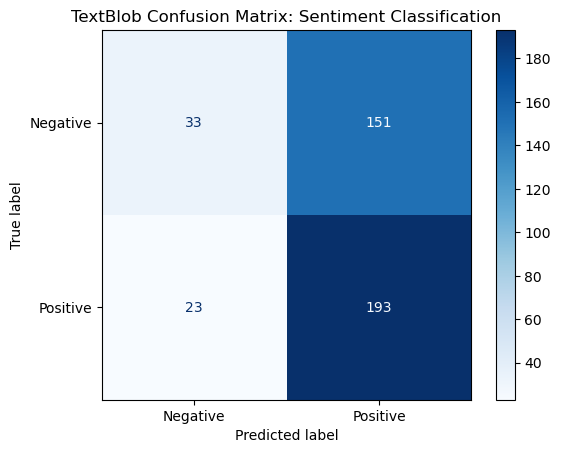


TextBlob Accuracy: 56.50%
TextBlob Runtime: 0.86 seconds

TESTING MODELS ON MEDICAL CARE!

Index(['Feedback', 'Sentiments'], dtype='object')

 RAW SENTIMENTS
                                                                                                                                                                                                                                                                            Feedback  Sentiments
0  Good and clean hospital. There is great team of doctors and good OT facility. The medical facilities are all great with good in-patient post operative care by doctors, nurses. The housekeeping staff is also good but they can respond to calls from the room a little faster.            1
1                                                                                                                                              Had a really bad experience during discharge. They need to be sensitive and more transparent towards the patient and his

<Figure size 600x500 with 0 Axes>

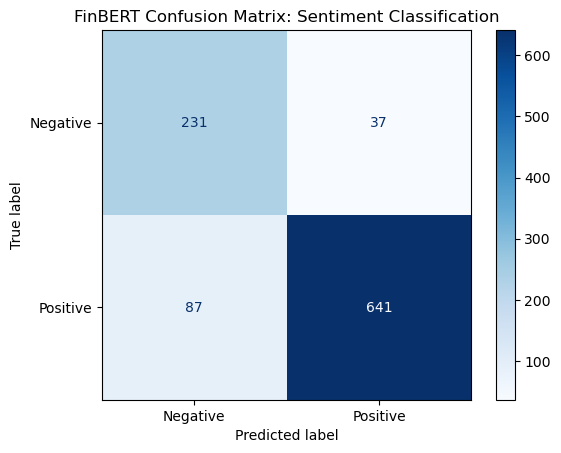


FinBERT Accuracy: 87.55%

FinBERT Accuracy (excluding neutrals): 90.72%
FinBERT Runtime: 70.57 seconds

DistilBERT Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

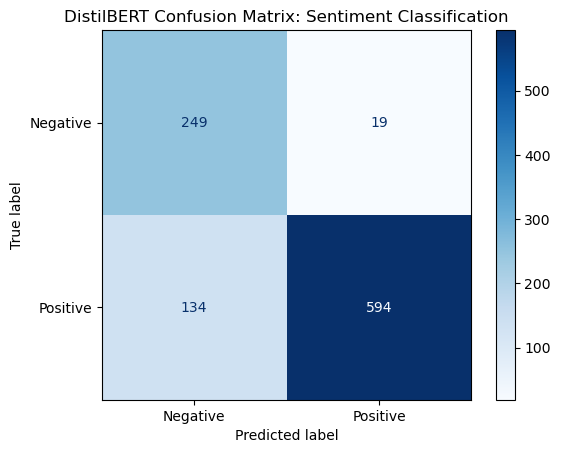


DistilBERT Accuracy: 84.64%
DistilBERT Runtime: 43.63 seconds

TextBlob Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

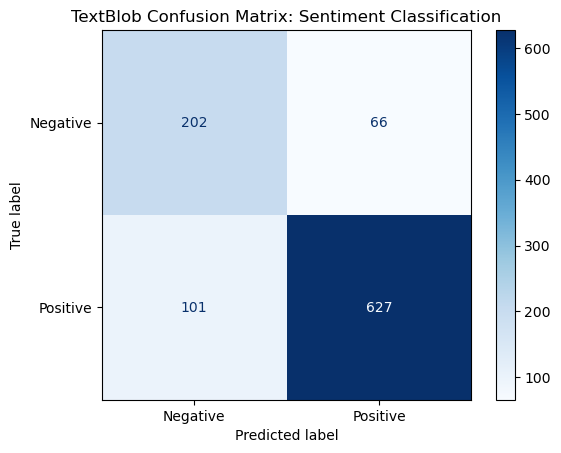


TextBlob Accuracy: 83.23%
TextBlob Runtime: 0.32 seconds

TESTING MODELS ON RETAIL REVIEWS!

Index(['Reviews', 'Sentiments'], dtype='object')

 RAW SENTIMENTS
                                                                              Reviews  Sentiments
0  So there is no way for me to plug it in here in the US unless I go by a converter.           0
1                                                         Good case, Excellent value.           1
2                                                              Great for the jawbone.           1
3     Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!           0
4                                                                   The mic is great.           1

 Data dimension =  (1000, 2)

 ZERO-TRUST EVALUATION METRIC

FinBERT Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

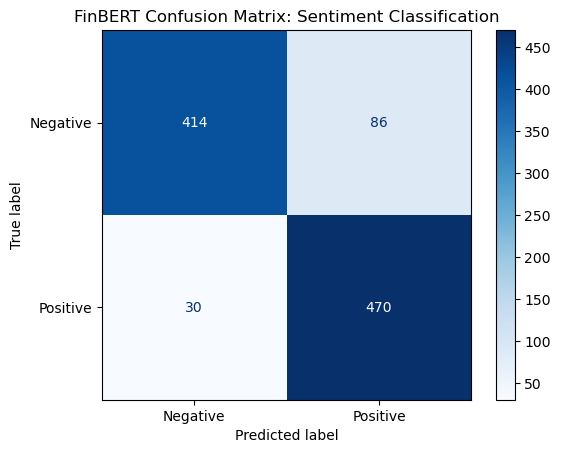


FinBERT Accuracy: 88.40%

FinBERT Accuracy (excluding neutrals): 97.69%
FinBERT Runtime: 65.38 seconds

DistilBERT Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

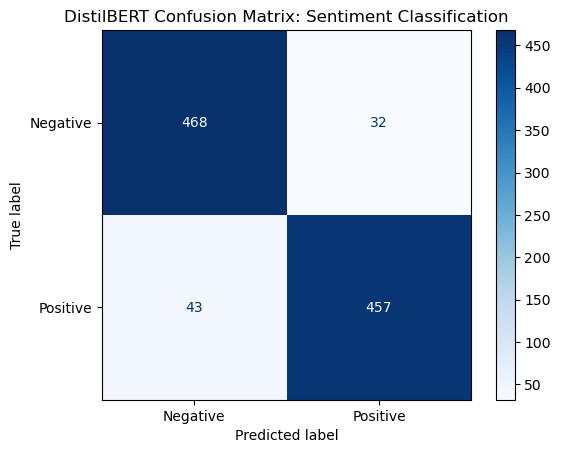


DistilBERT Accuracy: 92.50%
DistilBERT Runtime: 32.74 seconds

TextBlob Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

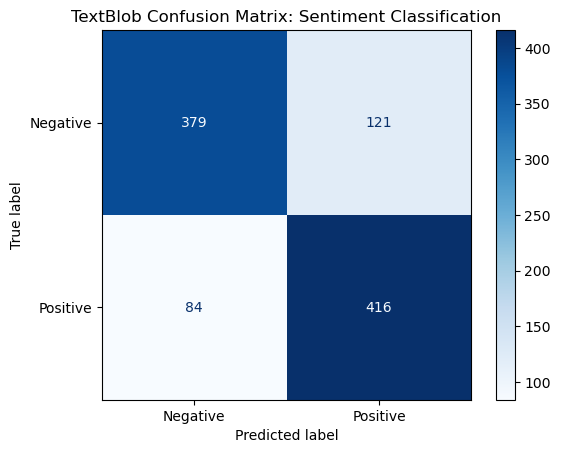


TextBlob Accuracy: 79.50%
TextBlob Runtime: 0.26 seconds



Enter the path to file you want to test these models with(enter q to quit):  Social_Text.csv


Index(['Text', 'Sentiments'], dtype='object')

 RAW SENTIMENTS
                                                                                                                                                                                                                                                                           Text Sentiments
0                                                                                                                                                                                   @Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄   Negative
1                                                                                                                                                                                                       CSGO matchmaking is so full of closet hacking, it's a truly awful game.   Negative
2  Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the littl

<Figure size 600x500 with 0 Axes>

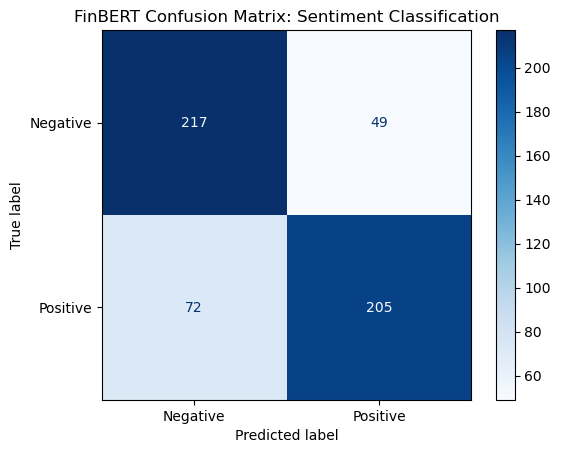


FinBERT Accuracy: 77.72%

FinBERT Accuracy (excluding neutrals): 90.51%
FinBERT Runtime: 45.73 seconds

DistilBERT Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

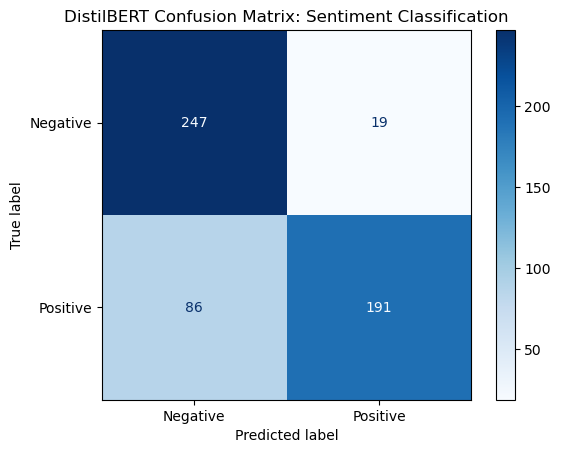


DistilBERT Accuracy: 80.66%
DistilBERT Runtime: 23.47 seconds

TextBlob Label Distribution in True Data:


<Figure size 600x500 with 0 Axes>

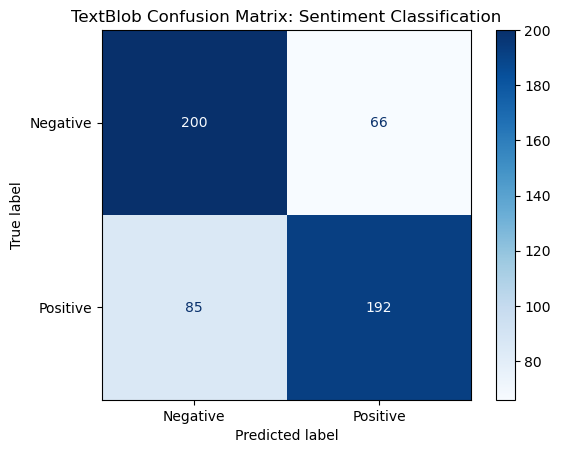


TextBlob Accuracy: 72.19%
TextBlob Runtime: 0.18 seconds



Enter the path to file you want to test these models with(enter q to quit):  \-


In [ ]:
"""
NLP: Model Analysis and Comparison. 
Comparing TextBlob, FinBERT, and distilbert
Features: User enters filename/path as they choose. Program will test each nlp on finance news, medical, and amazon reviews. 
Created November 2 2025

@author: V_Morgan
"""

#!pip install textblob
#nltk.download('vader_lexicon')
#!pip install torch
#!pip install transformers

import transformers
import torch
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel, pipeline, logging

#Silencing CPU usage messages
logging.set_verbosity_error()

#Importing FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

#Importing distilbert
tokenizer_2 = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model_2 = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
distilbert = pipeline("sentiment-analysis", model=model_2, tokenizer = tokenizer_2)

class NLPComparison:
    
    def load_data(self, file_path):
        self.finbert = None
        self.distilbert = None
        self.textblob = None 
        
        if file_path.lower().endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file_path.lower().endswith('.txt'):
            df = pd.read_csv(file_path, delimiter='\t')

        #Loading Data into individual dataframes
        self.finbert = df.copy()
        self.distilbert = df.copy()
        self.textblob = df.copy()

        print(df.columns)        
        print('\n RAW SENTIMENTS')
        print(df.head().to_string(index=True))
        print('\n Data dimension = ', df.shape)
        
    def compute_sentiment(self): 
        df = self.finbert
        df2 = self.distilbert
        df3 = self.textblob
        
        predicted_labels = []
        neutral_indices = []
        predicted_labels2 = []
        predicted_labels3 = []

        #FinBERT computations
        start_time = time.time()
        predictions = finbert(df.iloc[:, 0].tolist(), top_k=None, truncation=True)
        for idx, sent in enumerate(predictions):
            scores = {r['label']: r['score'] for r in sent}
            label = max(scores, key=scores.get)

            #Filtering neutrals to positive or negative
            if label == 'neutral':
                neutral_indices.append(idx)
                if scores['positive'] > scores['negative']:
                    label = 'positive'
                else:
                    label = 'negative'
            predicted_labels.append(label)

        df['Polarity_label'] = predicted_labels
        df['Predicted_Label'] = df['Polarity_label'].str.strip().str.lower()
        label_map = {'positive': 1, 'negative': 0}
        df['Predicted_Label'] = df['Polarity_label'].map(label_map)        

        self.finbert = df
        self.finbert_neutral = neutral_indices

        finbert_time = time.time() - start_time
        
        #distilbert computations
        start_time = time.time()

        
        predictions = distilbert(df2.iloc[:, 0].tolist(), truncation=True)
        
        predicted_labels2 = [sent['label'].lower() for sent in predictions]
        
        df2['Polarity_label'] = predicted_labels2
        df2['Predicted_Label'] = df2['Polarity_label'].map(label_map)
        
        self.distilbert = df2
        distilbert_time = time.time() - start_time

        #TextBlob computations
        start_time = time.time()
        for x in range(0, df.shape[0]):
            score_list = TextBlob(df3.iloc[x, 0])
            pola_score = score_list.sentiment.polarity
            predicted_labels3.append(pola_score)

        df3['Polarity_score'] = predicted_labels3
        df3['Predicted_Label'] = np.where(df3['Polarity_score'] > 0, 1, 0)
        self.textblob = df3
        textblob_time = time.time() - start_time

        #Storing Runtimes for display
        self.runtimes = {"FinBERT": finbert_time, "DistilBERT": distilbert_time, "TextBlob": textblob_time}

    def evaluation_confusion_matrix(self):
        print('\n ZERO-TRUST EVALUATION METRIC')

        #Mapping model names to their dataframes for informed displays
        models = {"FinBERT": self.finbert, "DistilBERT": self.distilbert, "TextBlob": self.textblob}
        
        for name, df in models.items():
            print(f"\n{name} Label Distribution in True Data:")
            df_sent = df['Sentiments']

            #If sentiment read in is already 1 and 0 use it as it
            if pd.api.types.is_numeric_dtype(df_sent):
                true_labels = df_sent.dropna().astype(int)
            else:
                #Ensures non-1 and 0 sentiment are either positive or negative and converts them to 1 and 0
                valid_mask = df_sent.notna() & df_sent.str.strip().str.lower().isin(['positive', 'negative'])
                true_labels = df_sent.loc[valid_mask].str.strip().str.lower().map({'positive': 1, 'negative': 0}).astype(int)
            
            
            predicted_labels = df.loc[true_labels.index, 'Predicted_Label'].astype(int)
            
            cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
            
            plt.figure(figsize=(6, 5))
            disp.plot(cmap='Blues', values_format='d')
            plt.title(f'{name} Confusion Matrix: Sentiment Classification')
            plt.show()
            
            acc = accuracy_score(true_labels, predicted_labels)              
            print(f"\n{name} Accuracy: {acc:.2%}")

            if name == "FinBERT":
                maskNeutral = ~df.index.isin(self.finbert_neutral)
                mask = maskNeutral & true_labels.index.to_series().notna()
                
                true_labels_ex = true_labels[mask]
                predicted_labels_ex = predicted_labels[mask]
                
                acc_ex = accuracy_score(true_labels_ex, predicted_labels_ex)
                print(f"\n{name} Accuracy (excluding neutrals): {acc_ex:.2%}")
                
            #Displaying runtimes
            print(f'{name} Runtime: {self.runtimes[name]:.2f} seconds')





#----------------------------Class Driver --------------------------------------
handle = NLPComparison()

print("Welcome to my NLP Sentiment Analysis Model Comparison. This Program compares FinBert, DistilBERT and TextBlob.\n")
file_path = " "

testPaths = {"FINANCES": 'Finance_Text.csv', "MEDICAL CARE": 'Hospital_Text.csv', "RETAIL REVIEWS": 'amazon_labelled.txt'}

for theme, filePath in testPaths.items():
    print(f"\nTESTING MODELS ON {theme}!\n")
    handle.load_data(filePath)
    handle.compute_sentiment()
    handle.evaluation_confusion_matrix()
    plt.close('all')

while file_path.strip().lower() != 'q':
    file_path = input("\nEnter the path to file you want to test these models with(enter q to quit): ").strip()
    
    if file_path.strip().lower() == 'q':
        print("Exiting Program.")
        break
        
    while not os.path.isfile(file_path):
        file_path = input("We could not locate that file. Please enter the full path.").strip()
        
    handle.load_data(file_path)
    handle.compute_sentiment()
    handle.evaluation_confusion_matrix()
